# A) Statistical studies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(42)

## Reading the serie

In [3]:
df = pd.read_csv('/kaggle/input/complete-load-data/Total_Load.csv')
df.head(24)

,Time,Load
0,0,0.000003
1,3600,2.184715
2,7200,1.916824
3,10800,1.785713
4,14400,1.732656
5,18000,2.966157
6,21600,3.967359
7,25200,5.078456
8,28800,6.176139
9,32400,9.050642


In [4]:
df['Time'] = pd.to_datetime(df['Time'])
ts_data = pd.Series(df['Load'].values, index=df['Time'])

<Axes: xlabel='Time'>

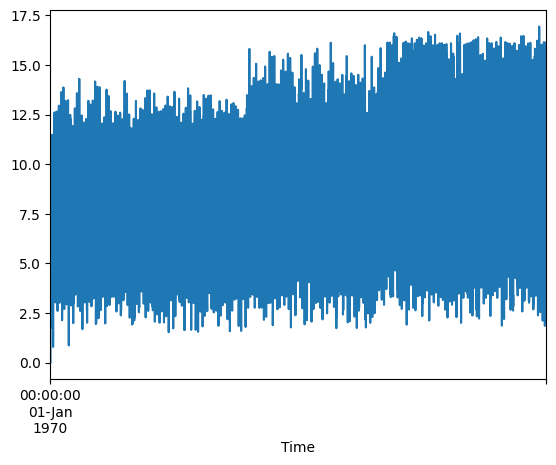

In [5]:
ts_data.plot()

# 1) Visualisation

a) observation

Text(0, 0.5, 'Value')

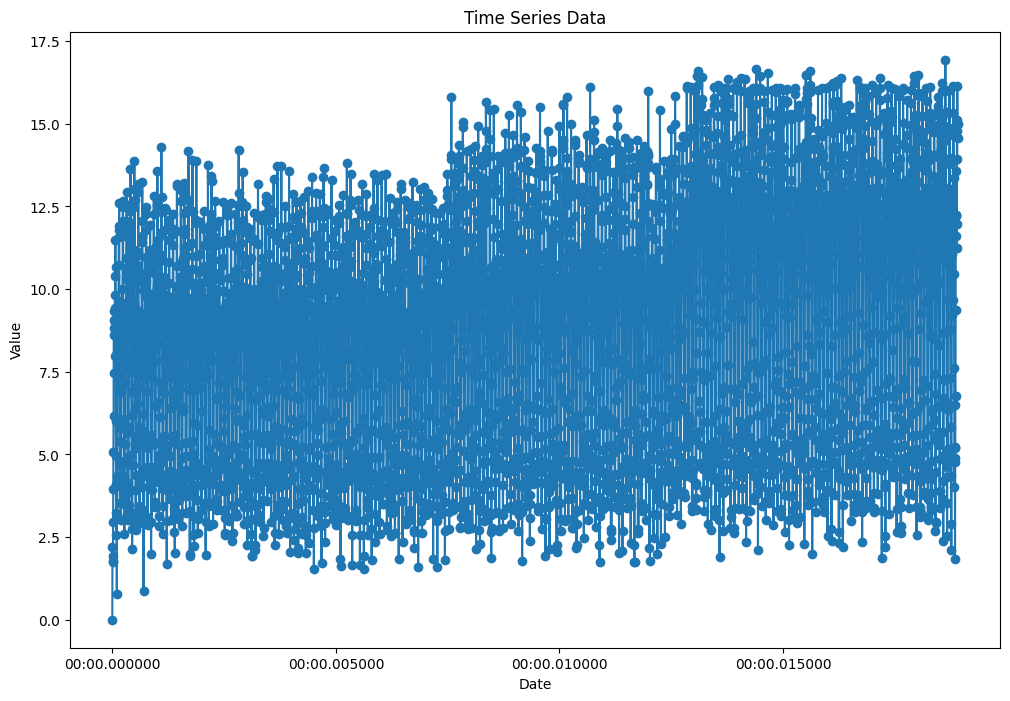

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(ts_data, marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

b) Descriptive statistics

In [7]:
ts_data.describe()

count    5253.000000
mean        8.738243
std         3.799950
min         0.000003
25%         5.077551
50%         9.118970
75%        11.867601
max        16.936654
dtype: float64

With statsmodels

In [8]:
from statsmodels.stats.descriptivestats import describe

print(describe(ts_data))

                             0
nobs              5.253000e+03
missing           0.000000e+00
mean              8.738243e+00
std_err           5.242932e-02
upper_ci          8.841002e+00
lower_ci          8.635483e+00
std               3.799950e+00
iqr               6.790050e+00
iqr_normal        5.033472e+00
mad               3.304502e+00
mad_normal        4.141579e+00
coef_var          4.348644e-01
range             1.693665e+01
max               1.693665e+01
min               3.057630e-06
skew              3.766294e-02
kurtosis          1.842769e+00
jarque_bera       2.943555e+02
jarque_bera_pval  1.206493e-64
mode              3.057630e-06
mode_freq         1.903674e-04
median            9.118970e+00
1%                2.161709e+00
5%                3.139719e+00
10%               3.787934e+00
25%               5.077551e+00
50%               9.118970e+00
75%               1.186760e+01
90%               1.379377e+01
95%               1.480581e+01
99%               1.609372e+01


# 2) Stationarity tests

## 2-1) is the time serie stationary?

<div style="background-color: red; padding: 10px; border-left: 5px solid #c62828;">
  <strong>Warning:</strong> H0 and H1 of ADF/PP are inversed with those of KPSS
</div>

### a) ADF

In [9]:
a = adfuller(ts_data)
print("The test statistic: ", a[0])
print("pvalue: ", a[1])
for key, value in a[4].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  -4.564574220596621
pvalue:  0.0001500481737234599
Critical values for the test statistic at the  1% :  -3.4316035963290337
Critical values for the test statistic at the  5% :  -2.862093959137102
Critical values for the test statistic at the  10% :  -2.5670648722409877


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.001 $ \leq $ significance level = 0.05
    - test statistic = -3.90 $ \leq $ critical value (%5) = -2.86
- We reject the $H_0$, so the time serie is stationary

b) KPSS

In [10]:
b = kpss(ts_data)
print("The test statistic: ", b[0])
print("pvalue: ", b[1])
for key, value in b[3].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  9.147721163668466
pvalue:  0.01
Critical values for the test statistic at the  10% :  0.347
Critical values for the test statistic at the  5% :  0.463
Critical values for the test statistic at the  2.5% :  0.574
Critical values for the test statistic at the  1% :  0.739


/tmp/ipykernel_103/3987708660.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  b = kpss(ts_data)


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.01 $ \leq $ significance level = 0.05
    - test statistic = 10.62 > critical value (5%) = 0.463
- We reject the $H_0$, so the time serie is not stationary

c) PP

In [11]:
!pip install arch

In [12]:
from arch.unitroot import PhillipsPerron as pp

pp(ts_data)

Test Statistic,-13.745
P-value,0.000
Lags,33


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0 $ \leq $ significance level = 0.05
    - test statistic = -13.745 $ \leq $ critical value (5%) = -2.86
- We reject the $H_0$, so the time serie is stationary

## 2-2) Why the test statistic of ADF/PP is different than KPSS ?
- ADF/PP:
    - the test statistic is based on the idea of testing the presence of a unit root
    - ADF test uses AR with lagged differences to account for autocorrelation, while the PP test corrects for serial correlation non-parameticly
    - The test statistic is compared to critical values, and if it is more negative than the critical value, the null hypothesis (unit root) is rejected.
    
- KPSS:
    - The test statistic is based on the idea of test the stationatity around a deterministic trend or level.
    - It calculates the cumulative sum of residuals from a regression of the series on a constant (or a constant and trend) and compares it to the asymptotic distribution of the test statistic.
    - If the test statistic exceeds the critical value, the null hypothesis (stationarity) is rejected.

# 3) Analysis of the time structure

## 3-1) ACF and PACF plots

Text(0.5, 0.98, 'ACF and PACF Plots of original time series')

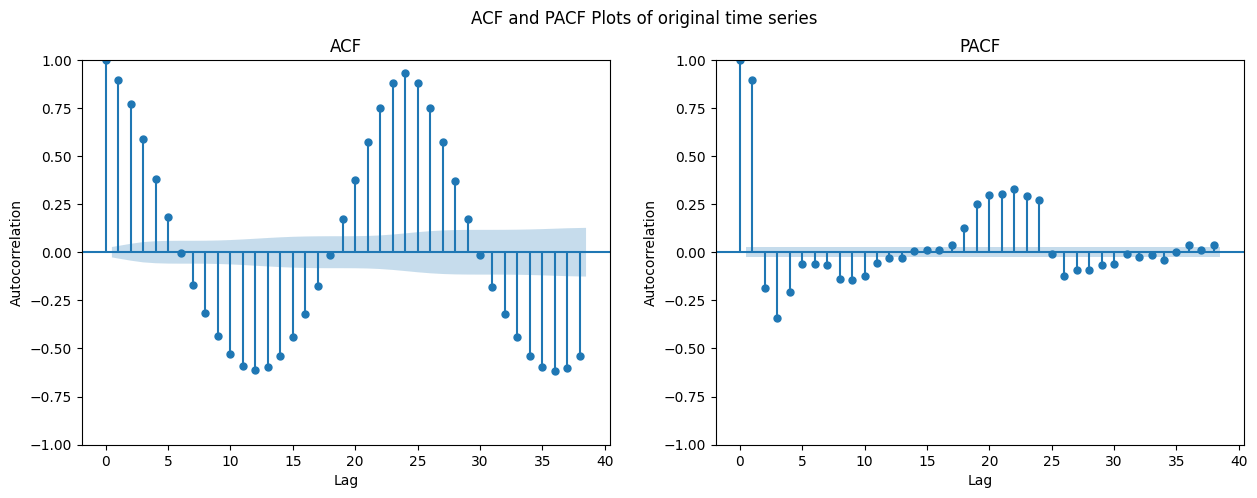

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(1,2, figsize=(15,5))


plot_acf(ts_data, ax = ax[0])
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title("ACF")


plot_pacf(ts_data, ax = ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_title("PACF")

fig.suptitle("ACF and PACF Plots of original time series")

# For the stationary TS
- ACF plot damped sin function:
    - So it is a AR(p) model
- PACF plot:
    - We have only 1 significant chart
- Conclusion:
    - we can use ARIMA(data, order=(1, 0, 0))

## 3-2) Decomposition

a) Multiplicative model

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom_plot = seasonal_decompose(ts_data, model='multiplicative')
decom_plot.plot()
plt.show()


ValueError: freq NS not understood. Please report if you think this is in error.

b) additive model

In [ ]:
decom_plot = seasonal_decompose(ts_data, model='additive')
decom_plot.plot()
plt.show()


# 4) Modelisation

## 4.1- ARMA Model with the concluded params from ACF and PACF plot

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3600ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3600ns will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   None   No. Observations:                 5253
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10275.516
Date:                Sat, 10 May 2025   AIC                          20555.032
Time:                        13:02:45   BIC                          20568.165
Sample:                    01-01-1970   HQIC                         20559.623
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9838      0.002    398.204      0.000       0.979       0.989
sigma2         2.9262      0.061     48.283      0.000       2.807       3.045
Ljung-Box (L1) (Q):                  84.44   Jarque-

Text(0.5, 1.0, 'ARMA Model Predicitons (with get_forecast)')

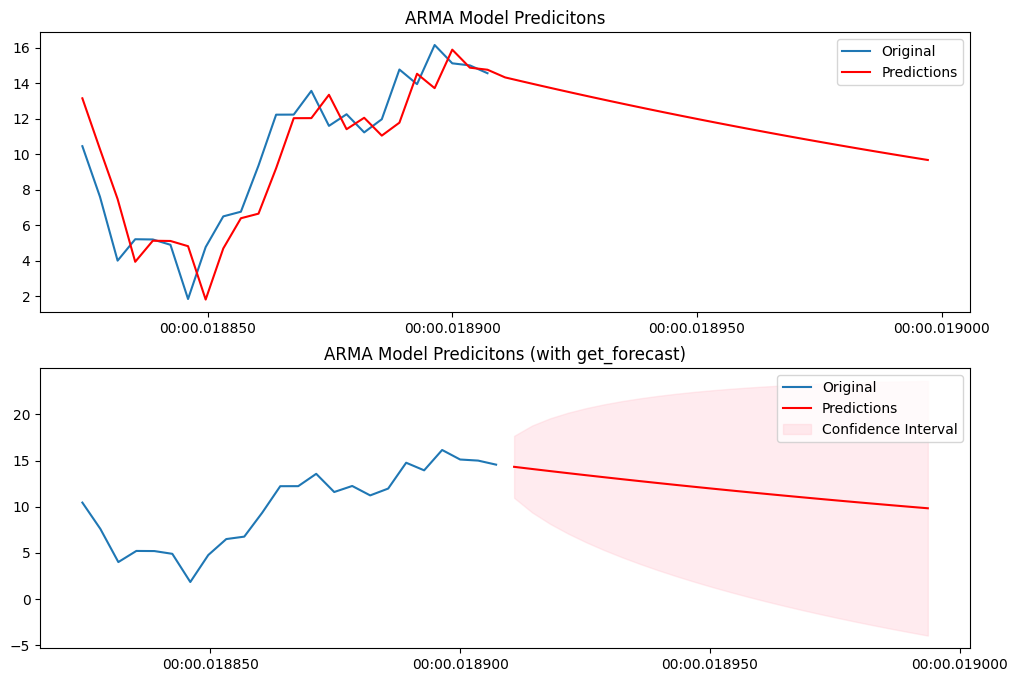

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(ts_data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
arma = model.fit()

print(arma.summary())

#1st method of prediction:
predictions = arma.predict(start=len(ts_data)-24, end=len(ts_data)+24) # Example: predict last 24 values and 24 future values

#2nd method of prediction:
forecast = arma.get_forecast(steps=24)
forecast_ci = forecast.conf_int()


fig, ax = plt.subplots(2,1, figsize=(12, 8))




ax[0].plot(ts_data[-24:], label='Original')
ax[0].plot(predictions, color='red', label='Predictions')
ax[0].legend()
ax[0].set_title("ARMA Model Predicitons")



ax[1].plot(ts_data[-24:], label='Original')
ax[1].plot(forecast.predicted_mean, color='red', label='Predictions')
ax[1].fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
ax[1].legend()
ax[1].set_title("ARMA Model Predicitons (with get_forecast)")


## 4.2) Searching for the best ARIMA params

In [16]:
!pip install pmdarima

In [17]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import pmdarima as pm


best_model = pm.auto_arima(ts_data,
                           seasonal=False,
                           stationary=False,
                           start_p=1,
                           max_p=5,
                           start_q=0,
                           max_q=2,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20508.581, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20590.342, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20536.555, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20588.356, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20167.488, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20152.160, Time=0.86 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=20088.739, Time=1.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=20038.562, Time=2.45 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=15.18 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=20036.570, Time=0.95 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=20086.747, Time=0.89 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=4.57 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=3.35 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]     

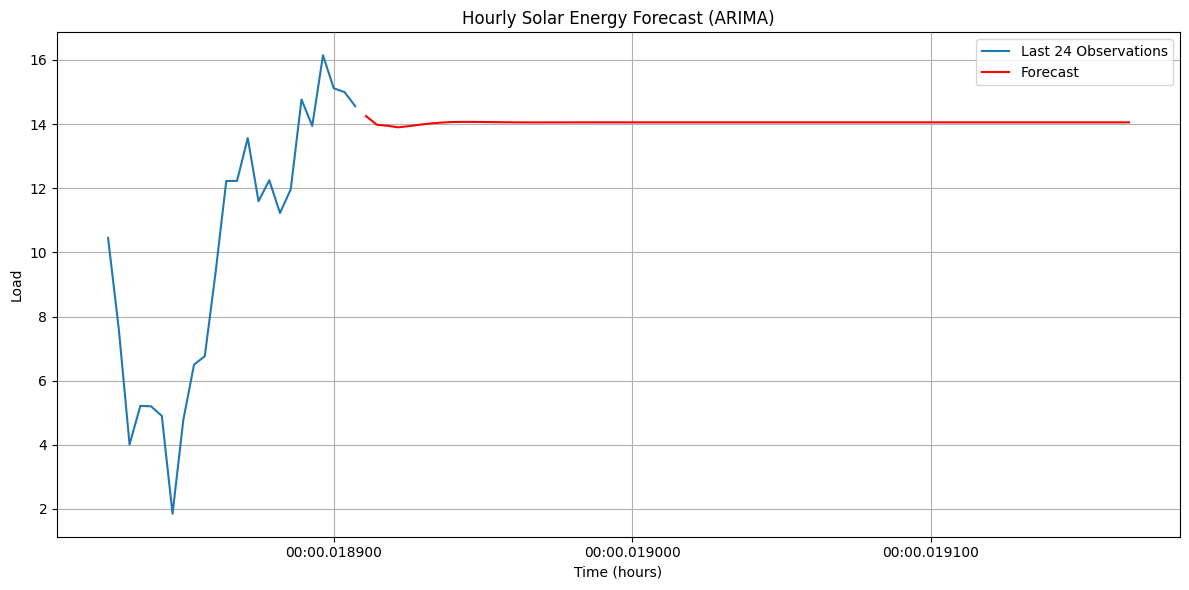

In [18]:
n_periods = 72
predictions = best_model.predict(n_periods=n_periods)

plt.figure(figsize=(12, 6))
plt.plot(ts_data[-24:], label='Last 24 Observations')
plt.plot(predictions, color='red', label='Forecast')
plt.legend()
plt.title("Hourly Solar Energy Forecast (ARIMA)")
plt.xlabel("Time (hours)")
plt.ylabel("Load")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Validation

## 5.1) Errors Analysis

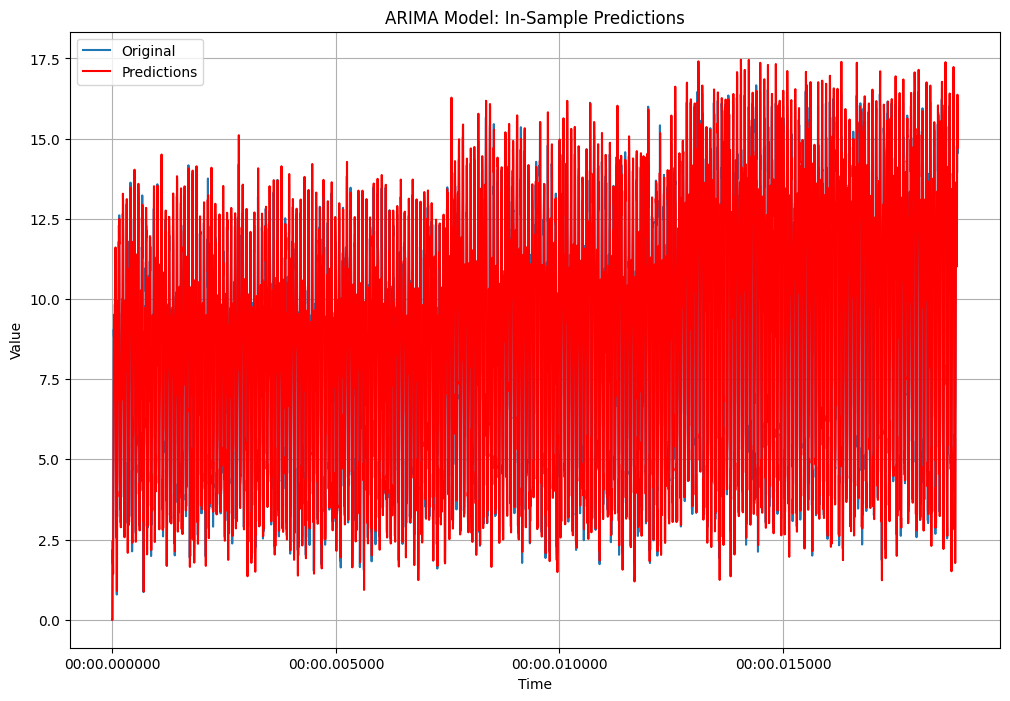

MAE: 1.304
MSE: 2.650
RMSE: 1.628


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = best_model.predict_in_sample()

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.title("ARIMA Model: In-Sample Predictions")
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

mae = mean_absolute_error(ts_data, predictions)
mse = mean_squared_error(ts_data, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


## 5.2) Residual Analysis

## a) Risiduals

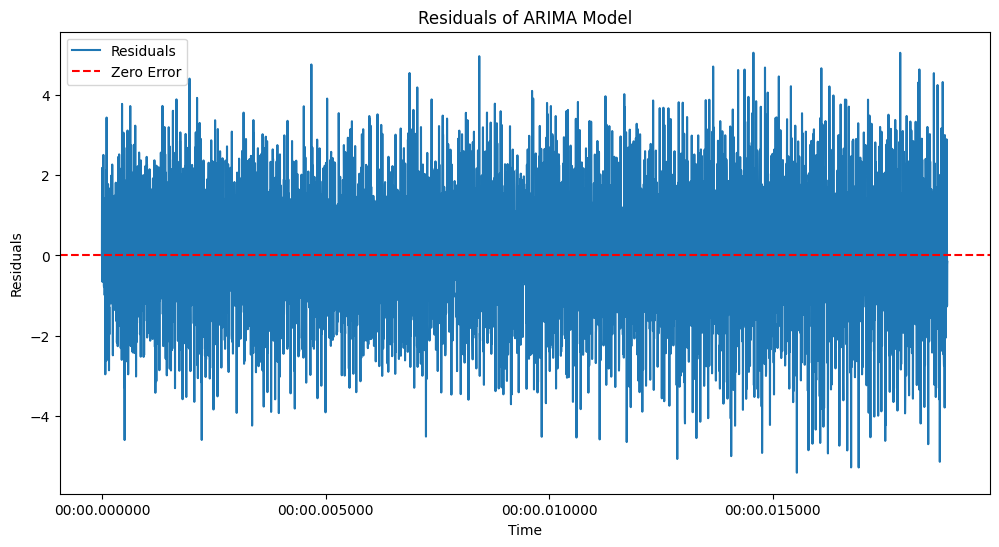

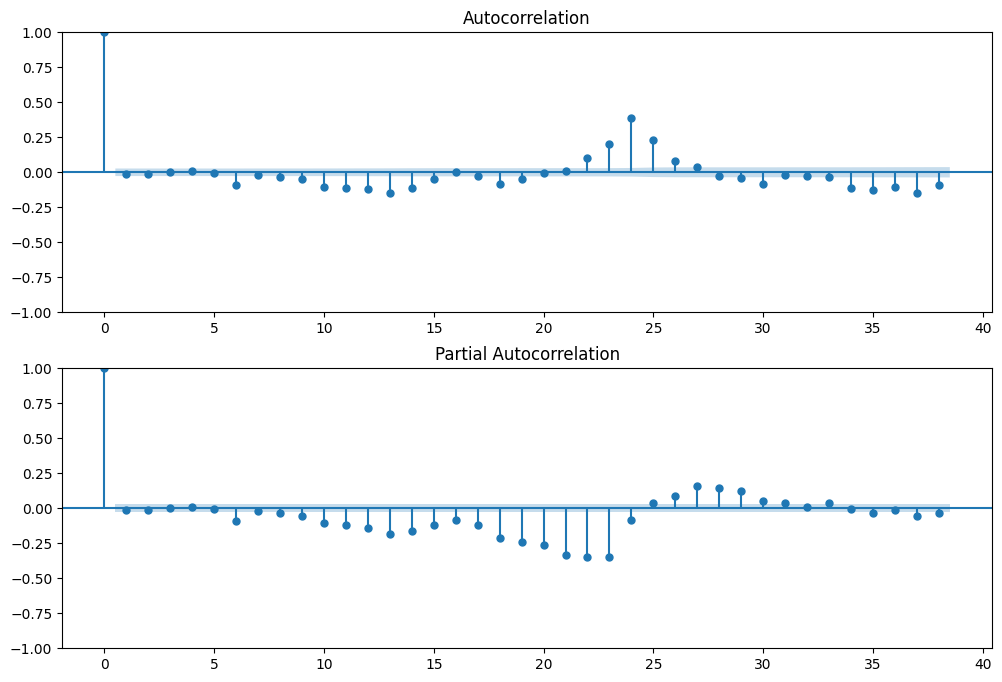

In [20]:
residuals = best_model.resid() # residuals = ts_data - predictions


plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.title("Residuals of ARIMA Model")
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)
plt.show()

## b) making sure that the risidual is a white noise

In [21]:
# 1. ADF Test
adf_result = adfuller(residuals)
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")
print()

# 2. KPSS Test
kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend
print("KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print(f"Critical Values: {kpss_result[3]}")
print()

# 3. PP Test
pp_result = pp(residuals)
print("PP Test Results:")
print(f"PP Statistic: {pp_result.stat}")
print(f"p-value: {pp_result.pvalue}")
print(f"Critical Values: {pp_result.critical_values}")

ADF Test Results:
ADF Statistic: -15.312772906811219
p-value: 4.164648253660639e-28
Critical Values: {'1%': -3.431603356058229, '5%': -2.862093852984781, '10%': -2.5670648157322997}

KPSS Test Results:
KPSS Statistic: 0.013851496020189275
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

PP Test Results:
PP Statistic: -90.56228917866356
p-value: 0.0
Critical Values: {'1%': -3.4315957157264836, '5%': -2.8620904774601432, '10%': -2.567063018820234}


/tmp/ipykernel_103/3522448530.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend


# The residuals of the best ARIMA model are stationary, fluctuate around 0, and have no autocorrelation (p=0 and q=0 look at ACF/PACF), then they can be considered white noise.

# 6) Predictions of futures

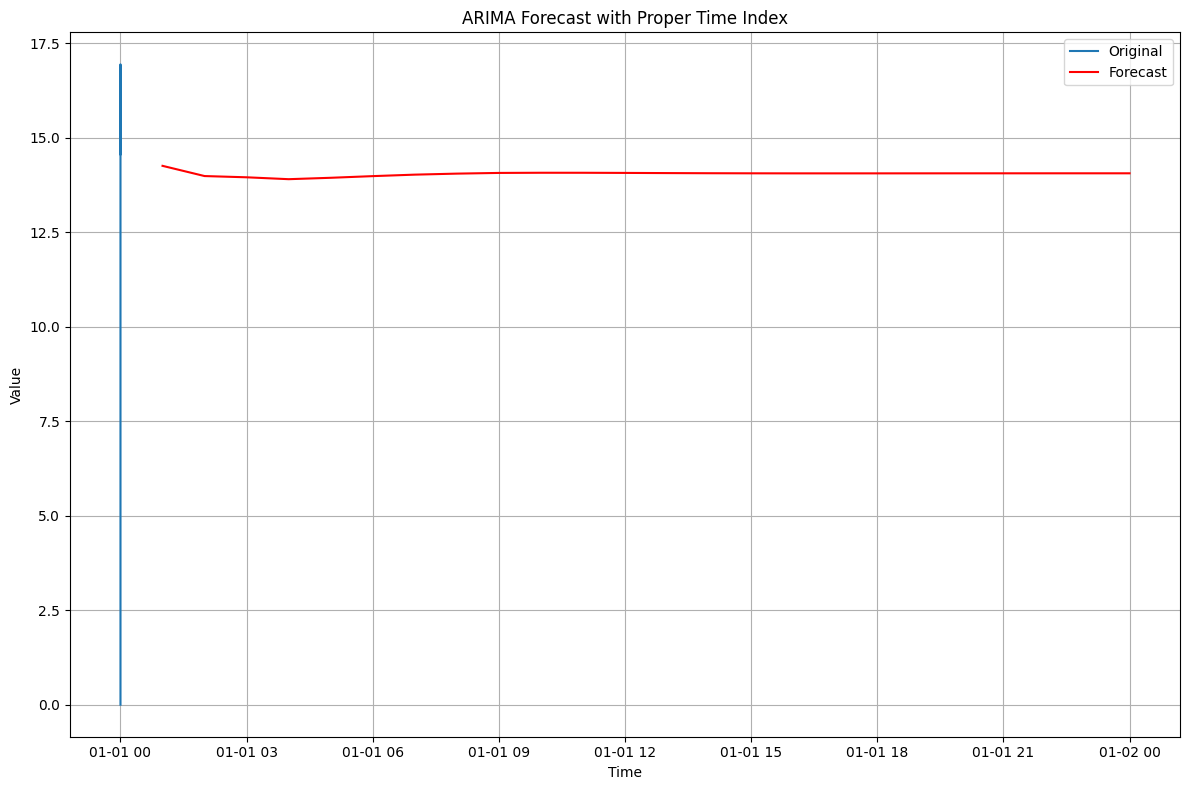

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


freq = 'H'

last_timestamp = ts_data.index[-1]


future_steps = 24

forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(1, unit=freq[0]), 
                               periods=future_steps, freq=freq)
forecast = best_model.predict(n_periods=future_steps)

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.title("ARIMA Forecast with Proper Time Index")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
